<a href="https://colab.research.google.com/github/qpgabriel/GestConhecimento/blob/master/TrabalhoSemana9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [0]:
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Evaluation procedure #1: Train and test on the entire dataset

In [0]:
# create X (features) and y (response)
X = cancer.data
y = cancer.target

Logistic regression

In [0]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=100000)

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [0]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

569

Classification accuracy:

Proportion of correct predictions
Common evaluation metric for classification problems

In [0]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.9578207381370826


Known as training accuracy when you train and test the model on the same data

KNN (K=5)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9472759226713533


KNN (K=1)

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
predict1 = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9472759226713533


Evaluation procedure #2: Train/test split

In [0]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [0]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3, random_state=30)

In [0]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(566, 30)
(3, 30)


In [0]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(566,)
(3,)


In [0]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(max_iter=100000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Repeat for KNN with K=5:

In [0]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

1.0


Repeat for KNN with K=1:

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0



Can we locate an even better value for K?

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.3333333333333333


In [0]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

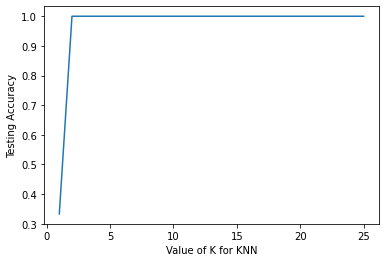

In [0]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Best Accuracy model: KNN(>=1)